# Basic Example

*TulipaProfileFitting.jl* is a package designed to fit power availability production profiles of renewable sources, such as wind and solar, from an existing base profile. This example shows how to use the package and explore the results.

If you encounter any problems, be sure to check whether you're using the same Julia version as is used here you should get a warning when activating the environment if this is not the case. The file **Project.toml** in this directory contains the necessary packages to run this notebook properly.

First things fist, activate the Julia environment to ensure consistency accross computers.

In [1]:
using Pkg
Pkg.activate(@__DIR__) # @__DIR__ = directory this script is in
Pkg.instantiate() # Download and install this environments packages
Pkg.precompile() # Precompiles all packages in environemt
println("Done")

  Activating project at `c:\github-repos\TulipaProfileFitting.jl\notebooks`


Done


In [2]:
import TulipaProfileFitting
import CSV
import Plots
import DataFrames
import HTTP

## Fitting a wind renewable profile

In [11]:
file_url = "https://raw.githubusercontent.com/TulipaEnergy/TulipaProfileFitting.jl/main/docs/src/files/wind_power_profile.csv"
df = DataFrames.DataFrame(CSV.File(HTTP.get(file_url).body, header=4))
show(stdout, MIME("text/html"), first(df, 5); eltypes=false)

Row,time,local_time,electricity
1,2019-01-01 00:00,2019-01-01 01:00,0.776
2,2019-01-01 01:00,2019-01-01 02:00,0.798
3,2019-01-01 02:00,2019-01-01 03:00,0.809
4,2019-01-01 03:00,2019-01-01 04:00,0.844
5,2019-01-01 04:00,2019-01-01 05:00,0.871


From the dataframe we can get the profile values as follows:

In [12]:
profile_values = df.electricity

8760-element Vector{Float64}:
 0.776
 0.798
 0.809
 0.844
 0.871
 0.878
 0.887
 0.876
 0.845
 0.802
 ⋮
 0.15
 0.204
 0.264
 0.31
 0.32
 0.3
 0.295
 0.316
 0.327

The current capacity factor of full load hours (e.g., mean value) can be determined using the following command:

In [13]:
current_cp = round(sum(profile_values)/8760;digits=2)

0.52

Let's define a new capacity factor of full load hours

In [14]:
target_cp = 0.6

0.6

We can use the function `find_solution` in this package to obtain the coefficient that fit the values to the target.

In [16]:
coefficient = TulipaProfileFitting.find_solution(profile_values, target_cp)

0.7307294689688651

The coefficient is the output of solving a non-linear equation `f(x)=0`. To learn more, please refer to the mathematical formulation section.

Using the coefficient, we can determine the new profile and plot the power production curves.

In [17]:
fitted_profile = profile_values.^coefficient

8760-element Vector{Float64}:
 0.8308425195328141
 0.8479897930411893
 0.8565155896623244
 0.883438364465284
 0.9040022226379142
 0.9093054155326858
 0.9161071112992317
 0.9077913830960715
 0.8842031174503315
 0.8510937220415896
 ⋮
 0.25000322051924556
 0.3129870860989321
 0.3778756825352759
 0.42493548646241
 0.43490911155461154
 0.41487483445825
 0.40981072812130404
 0.43092987914156144
 0.441840719158078

We can plot the results using:

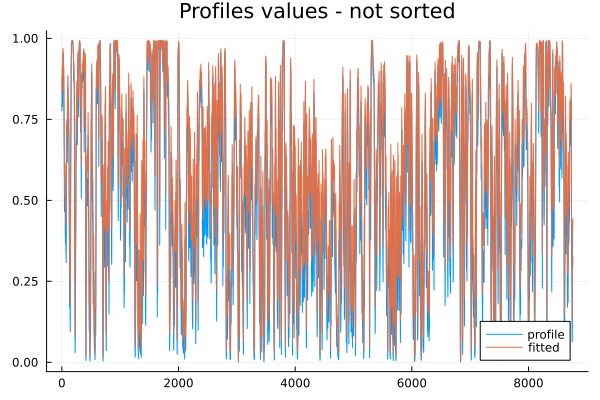

In [19]:
Plots.plot(profile_values, label="profile")
Plots.plot!(fitted_profile, label="fitted")
Plots.plot!(title="Profiles values - not sorted")

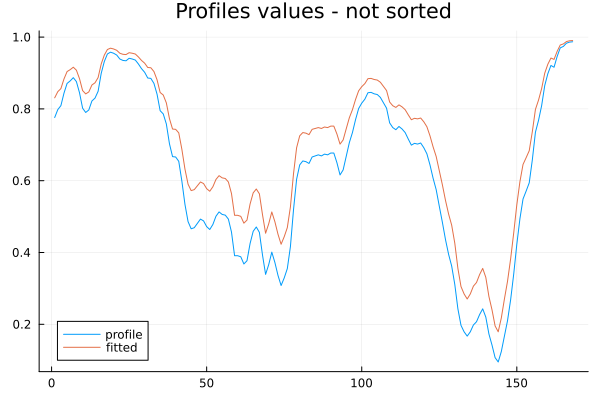

In [23]:
filtered_range = 1:168
Plots.plot(profile_values[filtered_range], label="profile")
Plots.plot!(fitted_profile[filtered_range], label="fitted")
Plots.plot!(title="Profiles values - not sorted")


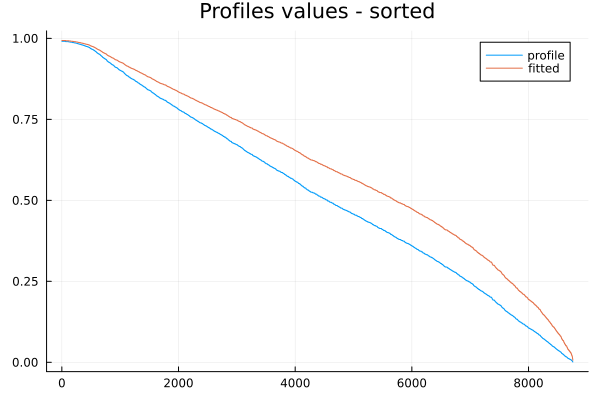

In [20]:
Plots.plot(sort(profile_values,rev=true), label="profile")
Plots.plot!(sort(fitted_profile,rev=true), label="fitted")
Plots.plot!(title="Profiles values - sorted")

It can be observed that the fitted curve primarily affects the intermediate value within the entire range. The values closer to one or zero remain relatively unchanged. This outcome is expected since the primary objective of the package is to adjust the intermediate value, thereby increasing or decreasing the capacity factor.

## Fitting a solar renewable profile